# Loading results

In [184]:
%run common_init.py

Start import
Done import
SYSTEM
	Running on linux
	Python version 3.7.6 (default, Jan  8 2020, 19:59:22) [GCC 7.3.0]
	Python installation /project/xenon/jorana/software/miniconda3/envs/dddm/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/project/xenon/jorana/software/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/project/xenon/jorana/software/wimprates/wimprates/



In [185]:
import multihist as mh

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle
import scipy.optimize

In [232]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [188]:
test = dddm.context['results_dir']
!ls $test 

nested_multinest0     nested_multinest2439  nested_multinest3000
nested_multinest1000  nested_multinest2440  nested_multinest3001
nested_multinest1007  nested_multinest2441  nested_multinest3002
nested_multinest1010  nested_multinest2442  nested_multinest3003
nested_multinest1012  nested_multinest2443  nested_multinest3004
nested_multinest1016  nested_multinest2444  nested_multinest3005
nested_multinest1022  nested_multinest2445  nested_multinest3006
nested_multinest1025  nested_multinest2446  nested_multinest3007
nested_multinest1041  nested_multinest2447  nested_multinest3008
nested_multinest1054  nested_multinest2448  nested_multinest3009
nested_multinest1063  nested_multinest2449  nested_multinest3010
nested_multinest1066  nested_multinest2450  nested_multinest3011
nested_multinest1078  nested_multinest2451  nested_multinest3012
nested_multinest1080  nested_multinest2452  nested_multinest3013
nested_multinest1092  nested_multinest2453  nested_multinest3014
nested_multinest1101  nes

In [189]:
def load_multinest_samples_from_file(load_dir):
    print(f"load_nestle_samples::\t{now()}\n\tloading", load_dir)
    keys = ['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
    result = {}
    for key in keys:
        result[key] = np.load(load_dir + key + '.npy', allow_pickle=True)
        if key is 'config' or key is 'res_dict':
            result[key] = result[key].item()
    print(f"load_multinest_samples_from_file::\t{now()}\n\tdone loading\naccess result with:\n{keys}")
    return result

from DirectDmTargets import default_nested_save_dir, get_result_folder, now
def load_multinest_samples(load_from=default_nested_save_dir(), item='latest'):
    base = get_result_folder()
    save = load_from
    files = os.listdir(base)
    if item is 'latest':
        item = max([int(f.split(save)[-1]) for f in files if save in f])

    load_dir = base + save + str(item) + '/'
    if not os.path.exists(load_dir):
        raise FileNotFoundError(f"Cannot find {load_dir} specified by arg: "
                                f"{item}")
    return load_multinest_samples_from_file(load_dir)

In [190]:
!ls -lthr $test | wc -l

1683


In [191]:
# loading normal results.
results = {}
for i in range(5000):
    try:
        result = load_multinest_samples(
            "nested_multinest", i)
        resdir = dddm.context['results_dir'] + f'nested_multinest{i}/'
        print(resdir)
#         if 'short' in results[i]['config']['notes'] or 'tmp' in results[i]['config']['notes']:
#             !rm -rf $resdir
#             pass
        if (not 'short' in result['config']['notes']) and (not 'TEST' in result['config']['notes']):
            results[i] = result
    except FileNotFoundError:
        pass
#         raise e

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:38
	loading /dcache/xenon/jorana/dddm/results/nested_multinest0/
load_multinest_samples_from_file::	2020-02-03T10:38
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest0/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	req

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest499/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest499/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest578/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest578/
get_result_folder::

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest658/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest658/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::

load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest730/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest730/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest733/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest733/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_fo

load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest790/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest858/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest858/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest937/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest937/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1007/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1007/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1010/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1078/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1078/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:39
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1080/
load_multinest_samples_from_file::	2020-02-03T10:39
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1080/
get_resul

load_nestle_samples::	2020-02-03T10:40
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1149/
load_multinest_samples_from_file::	2020-02-03T10:40
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1149/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder

load_multinest_samples_from_file::	2020-02-03T10:40
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1220/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:40
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1224/
load_multinest_samples_from_file::	2020-02-03T10:40
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1224/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder i

load_multinest_samples_from_file::	2020-02-03T10:40
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1285/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:40
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1288/
load_multinest_samples_from_file::	2020-02-03T10:40
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1288/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:40
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1290/
load_mult

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:40
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1361/
load_multinest_samples_from_file::	2020-02-03T10:40
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples'

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:41
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1435/
load_multinest_samples_from_file::	2020-02-03T10:41
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1435/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:41
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1515/
load_multinest_samples_from_file::	2020-02-03T10:41
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples'

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:42
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1602/
load_multinest_samples_from_file::	2020-02-03T10:42
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1602/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1871/
load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1871/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1872/
load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1872/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_resul

load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1911/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1913/
load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1913/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1914/
load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xen

load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1939/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1942/
load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1942/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:43
	loading /dcache/xenon/jorana/dddm/results/nested_multinest1991/
load_multinest_samples_from_file::	2020-02-03T10:43
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest1991/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_sampl

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2029/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2029/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2030/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2030/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2031/
load_multinest_samples_from_file::	2020-02-03T10:44
	do

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2056/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2057/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2057/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2058/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2058/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2080/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2081/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2081/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2082/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2082/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2103/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2104/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2104/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2105/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2105/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2125/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2126/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2126/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2127/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2127/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2147/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2148/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2148/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2149/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2149/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2169/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2170/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2170/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2171/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2171/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2191/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2192/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2192/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2193/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2193/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2213/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2214/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2214/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2215/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2215/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2236/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2237/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2237/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2238/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2238/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2258/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2259/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2259/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2260/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2260/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2280/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2281/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2281/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:44
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2282/
load_multinest_samples_from_file::	2020-02-03T10:44
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2282/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2302/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2303/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2303/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2304/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2304/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2327/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2328/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2328/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2329/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2329/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2352/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2353/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2353/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2354/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2354/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2376/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2377/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2377/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2378/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2378/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2400/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2401/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2401/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2402/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2402/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2423/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2424/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2424/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2425/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2425/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2445/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2446/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2446/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2447/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2447/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2468/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2469/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2469/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2470/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2470/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2490/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2491/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2491/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2492/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2492/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2513/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2514/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2514/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2515/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2515/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2535/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2536/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2536/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2537/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2537/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2557/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2558/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2558/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:45
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2559/
load_multinest_samples_from_file::	2020-02-03T10:45
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2559/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2579/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2580/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2580/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2581/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2581/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2601/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2602/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2602/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2603/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2603/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2625/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2626/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2626/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2627/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2627/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2650/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2651/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2651/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2652/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2652/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2672/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2673/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2673/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2674/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2674/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2697/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2698/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2698/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2699/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2699/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2722/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2723/
load_multinest_samples_from_file::	2020-02-03T10:46
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2723/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:46
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2724/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2724/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2744/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2745/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2745/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2746/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2746/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2766/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2767/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2767/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2768/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2768/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2788/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2789/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2789/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2790/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2790/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2813/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2814/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2814/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2815/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2815/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2835/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2836/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2836/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2837/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2837/
get_result_folder::	requested 

load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2857/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2857/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2858/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2858/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2859/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2881/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2882/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2882/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:47
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2883/
load_multinest_samples_from_file::	2020-02-03T10:47
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2883/
get_result_folder::	requested 

load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2904/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2904/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2905/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2905/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2906/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2926/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2927/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2927/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2928/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2928/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2950/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2951/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2951/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2952/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2952/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2973/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2974/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2974/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2975/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2975/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2996/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2997/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2997/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest2998/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest2998/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3018/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3019/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3019/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3020/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3020/
get_result_folder::	requested 

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3041/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3041/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3042/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3042/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3043/
load_multinest_samples_from_file::	2020-02-03T10:48
	do

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3064/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3065/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3065/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3066/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3066/
get_result_folder::	requested 

load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3087/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3087/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3088/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3088/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3089/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3109/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3110/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3110/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3111/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3111/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3133/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3134/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3134/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3135/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3135/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3156/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3157/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3157/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3158/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3158/
get_result_folder::	requested 

load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3180/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3180/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3181/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3181/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:48
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3182/
load_multinest_samples_from_file::	2020-02-03T10:48
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3202/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3202/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3203/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3203/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3204/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3225/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3226/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3226/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3227/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3227/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3249/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3250/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3250/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3251/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3251/
get_result_folder::	requested 

load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3272/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3272/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3273/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3273/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3274/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3294/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3295/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3295/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3296/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3296/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3316/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3317/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3317/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3318/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3318/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3338/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3339/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3339/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3340/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3340/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3362/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3363/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3363/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3364/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3364/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3384/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3385/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3385/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:49
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3386/
load_multinest_samples_from_file::	2020-02-03T10:49
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3386/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3406/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3407/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3407/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3408/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3408/
get_result_folder::	requested 

load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3429/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3429/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3430/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3430/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3431/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'w

load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3454/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3455/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3455/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3456/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3456/
get_result_folder::	requested 

load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3476/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3477/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3477/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
load_nestle_samples::	2020-02-03T10:50
	loading /dcache/xenon/jorana/dddm/results/nested_multinest3478/
load_multinest_samples_from_file::	2020-02-03T10:50
	done loading
access result with:
['config', 'res_dict', 'logZ', 'logZerr', 'weighted_samples']
/dcache/xenon/jorana/dddm/results/nested_multinest3478/
get_result_folder::	requested 

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	requested folder is /dcache/xenon/jorana/dddm/results/
get_result_folder::	reque

In [192]:
for key in results.keys(): 
    print(key, results[key]['config']['notes'])

0 multinest_save_intm_2601-433
306 multinest_save_intm_2601-44
384 multinest_save_intm_2601-1
409 multinest_save_intm_2601-4
429 multinest_save_intm_2601-7
453 multinest_save_intm_2601-44
465 multinest_save_intm_2601-49
470 multinest_save_intm_2601-50
481 multinest_save_intm_2601-13
488 multinest_save_intm_2601-45
493 multinest_save_intm_2601-55
499 multinest_save_intm_2601-56
508 multinest_save_intm_2601-10
518 multinest_save_intm_2601-19
533 multinest_save_intm_2601-62
544 multinest_save_intm_2601-61
551 multinest_save_intm_2601-51
559 multinest_save_intm_2601-85
562 multinest_save_intm_2601-25
567 multinest_save_intm_2601-16
578 multinest_save_intm_2601-67
602 multinest_save_intm_2601-2
612 multinest_save_intm_2601-3
614 multinest_save_intm_2601-57
622 multinest_save_intm_2601-91
631 multinest_save_intm_2601-31
646 multinest_save_intm_2601-88
658 multinest_save_intm_2601-86
664 multinest_save_intm_2601-73
665 multinest_save_intm_2601-74
683 multinest_save_intm_2601-127
684 multinest

In [193]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [194]:
def bin_center(xedges, yedges):
    return 0.5 * (xedges[0:-1] + xedges[1:]), 0.5 * (yedges[0:-1] + yedges[1:])
    

In [195]:
def get_hist(item, nbins = 45, bin_range = None):
#     nbins = 45
#     bin_range = [[1, 3], [-46, -44]]
    if bin_range == None:
        bin_range = [results[item]['config']['prior']['log_mass']['range'],
                 results[item]['config']['prior']['log_cross_section']['range']
                ]
    counts, xedges, yedges = np.histogram2d(*get_p_i(item), bins = nbins, range = bin_range)
    return counts , xedges, yedges

def get_hist_norm(item):
    counts , xedges, yedges = get_hist(item)
    return counts/np.sum(counts) , xedges, yedges

In [196]:
def get_p_i(i):
#     m, sig = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
    m, sig = results[i]['weighted_samples'].T[:2]
    
    return np.array([m, sig])

In [197]:
from matplotlib.colors import LogNorm
def combine_normalized(items, **plot_kwargs):
    X, Y = np.meshgrid(*get_hist_norm(items[0])[1:])
    for i in items:
        c,_,_ = get_hist_norm(i)
        im = plt.pcolor(X,Y,c.T, norm=LogNorm(vmin = 1e-4,vmax = 1),**plot_kwargs)  
    plt.colorbar()

In [198]:
def pow10(x):
    return 10 ** x

In [199]:
def confidence_plot(items, text_box = False, bin_range = None, nsigma = 2, nbins = 50):
    fig,ax=plt.subplots(figsize = (8,6))
    if bin_range == None:
        bin_range = [results[items[0]]['config']['prior']['log_mass']['range'],
                 results[items[0]]['config']['prior']['log_cross_section']['range']
                ]
    
    for k, item in enumerate(items):#, 78, 110 
        x,y =get_p_i(item)
        # Make a 2d normed histogram
        H,xedges,yedges=np.histogram2d(x,y,bins=nbins, range = bin_range, normed=True)
        norm=H.sum() # Find the norm of the sum
        # Set contour levels
        contour3=0.99
        contour2=0.95
        contour1=0.68
        # Take histogram bin membership as proportional to Likelihood
        # This is true when data comes from a Markovian process
        def objective(limit, target):
            w = np.where(H>limit)
            count = H[w]
            return count.sum() - target
        target1 = norm*contour1
        level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
        levels=[level1]
        if nsigma>1:
            target2 = norm*contour2
            level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
            levels.append(level2)
            if nsigma>2:
                target3 = norm*contour3
                level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))    
                levels.append(level3)
            if nsigma>3:
                print('Nsigma too big')
        levels.reverse()
        levels.append(H.max())
        # Find levels by summing histogram to objective
        
        
        

#         levels=[level1, level2, level3,H.max()]
        # Pass levels to normed kde plot
        def av_levels(x):
            return [(x[i] + x[i+1])/2 for i in range(len(x)-1)]

        if levels[0]==levels[1]:
            print("ERRRRRRRRR\n\n")
            print(levels)
            levels[0] /= 1.01
            levels = np.unique(levels)
            print(levels)
        sns_ax = sns.kdeplot(x,y, shade=True,ax=ax,n_levels=levels,cmap="viridis",normed=True, 
                    cbar = False, vmin=levels[0], vmax=levels[-1])
        kwargs = {}
        if k is 0:
            kwargs['label'] = 'best fit'
        plt.scatter(np.mean(x),np.mean(y), c='black',
                    marker = '+',**kwargs)
        if k is 0:
            kwargs['label'] = 'benchmark value'
        plt.scatter(results[item]['config']['mw'],
                    results[item]['config']['sigma'], c='blue',
                    marker = 'x',
                    **kwargs)
        if k is 0:
            cbar = ax.figure.colorbar(sns_ax.collections[0])
            cbar.set_ticks(av_levels(np.linspace(0,1,nsigma+1)))
            col_labels = ['$3\sigma$', '$2\sigma$', '$1\sigma$'][3-nsigma:]
            cbar.set_ticklabels(col_labels)
            cbar.set_label("Posterior probability")
    secax = ax.secondary_xaxis('top', functions=(pow10, np.log10))
    if 'migd' in results[items[0]]['config']['detector']:
        x_ticks = [0.01, 0.1, 1, 3]
    else:
        x_ticks = [15, 25, 50, 100, 250, 500, 1000]
    for x_tick in x_ticks:
        ax.axvline(np.log10(x_tick), alpha = 0.1)
    secax.set_ticks(x_ticks)
    plt.xlim(np.log10(x_ticks[0]),np.log10(x_ticks[-1]))
    plt.xlabel("$\log_{10}(M_{\chi}$ $[GeV/c^{2}]$)")
    secax.set_xlabel("$M_{\chi}$ $[GeV/c^{2}]$")
    plt.ylabel("$\log_{10}(\sigma_{S.I.}$ $[cm^{2}]$)")
    plt.legend(loc = 'upper right')

    if text_box:
        plt.text(0.05, 0.95, text_box, 
                 bbox=dict(facecolor="white",
                           boxstyle="round"), 
                 transform=ax.transAxes,
                 alpha=0.5)
#     plt.show()



In [200]:
def results_to_df(res):
    df = pd.DataFrame()
    items = sorted(list(res.keys()))
    df['item'] = items
    for key in res[np.min(list(res.keys()))].keys():
        if key in ['samples', 'weights']:
            continue
        if key == 'config' or key == 'res_dict':
            for sub_key in res[items[0]][key].keys():
                if sub_key == 'prior':
                    for sub_sub_key in res[items[0]][key][sub_key].keys():
                        if type(res[items[0]][key][sub_key][sub_sub_key]) == dict:
                            for sub_sub_sub_key in res[items[0]][key][sub_key][sub_sub_key].keys():
                                df[key+'_'+sub_key+'_'+sub_sub_key+'_'+sub_sub_sub_key] = [res[it][key][sub_key][sub_sub_key][sub_sub_sub_key] for it in items]
                        else:
                            df[key+'_'+sub_key+'_'+sub_sub_key] = [res[it][key][sub_key][sub_sub_key] for it in items]
                else:
                    df[key+'_'+sub_key] = [res[it][key][sub_key] for it in items]
            
        else:
            df[key] = [res[it][key] for it in items]
        
            
    df['mw'] = 10 ** df['config_mw']
    df['n_fit_parameters'] = [len(pars) for pars in df['config_fit_parameters']]
    return df
df = results_to_df(results)
df.head(5)

,item,config_detector,config_poisson,config_n_energy_bins,config_earth_shielding,config_save_intermediate,config_prior_log_mass_range,config_prior_log_mass_prior_type,config_prior_log_mass_param,config_prior_log_mass_dist,config_prior_log_cross_section_range,config_prior_log_cross_section_prior_type,config_prior_log_cross_section_param,config_prior_log_cross_section_dist,config_prior_density_range,config_prior_density_prior_type,config_prior_density_mean,config_prior_density_std,config_prior_density_param,config_prior_density_dist,config_prior_v_0_range,config_prior_v_0_prior_type,config_prior_v_0_mean,config_prior_v_0_std,config_prior_v_0_param,config_prior_v_0_dist,config_prior_v_esc_range,config_prior_v_esc_prior_type,config_prior_v_esc_mean,config_prior_v_esc_std,config_prior_v_esc_param,config_prior_v_esc_dist,config_prior_k_range,config_prior_k_prior_type,config_prior_k_param,config_prior_k_dist,config_v_0,config_v_esc,config_density,config_mw,config_sigma,config_halo_model,config_spectrum_class,config_det_params,config_start,config_notes,config_nlive,config_fit_parameters,config_fit_time,res_dict_log_mass_fit_res,res_dict_mass_fit_res,res_dict_log_cross_section_fit_res,res_dict_cross_section_fit_res,logZ,logZerr,weighted_samples,mw,n_fit_parameters
0,0,Xe_migd,False,10,False,True,"[-2, 1]",flat,"[-2, 1]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-42, -38]",flat,"[-42, -38]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,-1.00000,-39.0,shm,<class 'DirectDmTargets.detector.DetectorSpect...,"{'material': 'Xe', 'type': 'migdal', 'exp': 25...",2020-01-28 14:23:07.638992,multinest_save_intm_2601-433,300,"[log_mass, log_cross_section]",2179,-0.98 +/- 0.59,0.105 +/- 0.14,-40.09 +/- 1.11,8.05e-41 +/- 2.1e-40,-0.40824008289942953,0.03485262581845485,"[[0.008828818798065186, -40.16312265396118], [...",0.1,2
1,306,Xe_migd,False,10,True,True,"[-2, 1]",flat,"[-2, 1]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-42, -38]",flat,"[-42, -38]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,-0.30103,-41.0,shielded_shm,<class 'DirectDmTargets.detector.DetectorSpect...,"{'material': 'Xe', 'type': 'migdal', 'exp': 25...",2020-01-26 13:01:35.545508,multinest_save_intm_2601-44,100,"[log_mass, log_cross_section]",1662,-1.02 +/- 0.60,0.0954 +/- 0.13,-40.23 +/- 1.11,5.9e-41 +/- 1.5e-40,-0.31557283799056335,0.05279611905354691,"[[0.36224132776260376, -41.8382248878479], [0....",0.5,2
2,384,Xe_migd,False,10,False,True,"[-2, 1]",flat,"[-2, 1]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-42, -38]",flat,"[-42, -38]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,-1.00000,-41.0,shm,<class 'DirectDmTargets.detector.DetectorSpect...,"{'material': 'Xe', 'type': 'migdal', 'exp': 25...",2020-01-26 14:56:26.282133,multinest_save_intm_2601-1,100,"[log_mass, log_cross_section]",3596,-0.98 +/- 0.56,0.104 +/- 0.13,-40.00 +/- 1.17,1e-40 +/- 2.7e-40,-0.323

In [201]:
show_items = ['item','mw', 'config_sigma', #'res_dict_nestle_nposterior',
                   'config_notes', 'config_halo_model', 'n_fit_parameters', 'config_nlive']# 'res_dict_nestle_time']

In [202]:
def find_largest_posterior(df, sig = -38, mw = 1, fix_nlive= None):
    items = []
    for nparam in [2,5]:
        for halo in ['shm', 'shielded_shm']:
            mask = (
                (df['n_fit_parameters'] == nparam) & 
                (df['config_halo_model'] == halo) &
                (df['mw'] == mw) &
                (df['config_sigma'] == sig))
            if fix_nlive:
                mask = mask & (df['config_nlive'] == fix_nlive)
            sel_df = df[mask].sort_values('config_nlive')
            
            maskA = sel_df['config_halo_model'] == 'shielded_shm'
            maskB = np.array(['VerneSHM' in model for model in sel_df['config_halo_model'].values])
            mask2 = maskA | maskB
            print(np.sum(maskA), np.sum(maskB), np.sum(mask2))
            if halo == 'shielded_shm':
                sel_df = sel_df[mask2]
            else:
                sel_df = sel_df[~mask2]
            print(f'{halo} for {nparam} pars @ s = {sig}, m = {mw}')
            if len(sel_df):
                print(sel_df[['item', 'mw', 'config_sigma', 'config_nlive']][-2:-1])
                items.append(sel_df['item'].values[-1])
    return items
    
    

In [204]:
mask = np.array(['2601' in note for note in df.config_notes])
selections = [find_largest_posterior(df[~mask], *sigmw) for sigmw in [[-40,1], [-39, 0.5], [-39, 0.1]]]
selections

0 0 0
shm for 2 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
464  2525  1.0         -40.0           750
17 0 17
shielded_shm for 2 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
786  3339  1.0         -40.0           750
0 0 0
shm for 5 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
629  3182  1.0         -40.0           500
3 0 3
shielded_shm for 5 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
714  3267  1.0         -40.0           200
0 0 0
shm for 2 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
657  3210  0.5         -39.0          1000
23 0 23
shielded_shm for 2 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
611  3164  0.5         -39.0          1000
0 0 0
shm for 5 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
798  3351  0.5         -39.0           750
16 0 16
shielded_shm for 5 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
8

[[2818, 3139, 3318, 3406], [3391, 3357, 3410, 3442], [3384, 3228, 3426, 3443]]

In [222]:
show_items = [#'item',
 'mw',
 'config_sigma',
 'config_halo_model',
 'npar',
 'config_nlive']

In [223]:
df_at_mw_sig = pd.concat([df[df['item'] == item] for item in selections[0]])
df_at_mw_sig['npar'] = df_at_mw_sig['n_fit_parameters']
df_at_mw_sig['mass_fit'] = df_at_mw_sig['res_dict_mass_fit_res']
df_at_mw_sig['cross_section'] = df_at_mw_sig['res_dict_cross_section_fit_res']

In [225]:
df_at_mw_sig[show_items+['mass_fit', 'cross_section', 'config_fit_time']]

,mw,config_sigma,config_halo_model,npar,config_nlive,mass_fit,cross_section,config_fit_time
527,1.0,-40.0,shm,2,750,1.72 +/- 1.2,1.12e-41 +/- 3.9e-41,30058
588,1.0,-40.0,shielded_shm,2,750,1.87 +/- 1.1,4.04e-42 +/- 1e-41,65430
765,1.0,-40.0,shm,5,1000,1.61 +/- 1.1,1.12e-41 +/- 3.8e-41,44779
853,1.0,-40.0,shielded_shm,5,300,1.84 +/- 1.1,4.69e-42 +/- 1.2e-41,17100


In [206]:
df_at_mw_sig = pd.concat([df[df['item'] == item] for item in selections[1]])
df_at_mw_sig[show_items+['res_dict_mass_fit_res', 'res_dict_cross_section_fit_res']]

,item,mw,config_sigma,config_notes,config_halo_model,n_fit_parameters,config_nlive,res_dict_mass_fit_res,res_dict_cross_section_fit_res
838,3391,0.5,-39.0,generic_2901-77,shm,2,1000,0.814 +/- 0.61,6.53e-42 +/- 2.1e-41
804,3357,0.5,-39.0,generic_2901-70,shielded_shm,2,1000,0.195 +/- 0.22,4.19e-41 +/- 1.7e-40
857,3410,0.5,-39.0,multinest_save_intm_2901-77,shm,5,1000,0.823 +/- 0.57,5.05e-42 +/- 1.5e-41
889,3442,0.5,-39.0,multinest_save_intm_2901-83,shielded_shm,5,750,0.184 +/- 0.2,5.68e-41 +/- 2.2e-40


In [207]:
df_at_mw_sig = pd.concat([df[df['item'] == item] for item in selections[2]])
df_at_mw_sig[show_items+['res_dict_mass_fit_res', 'res_dict_cross_section_fit_res']]

,item,mw,config_sigma,config_notes,config_halo_model,n_fit_parameters,config_nlive,res_dict_mass_fit_res,res_dict_cross_section_fit_res
831,3384,0.1,-39.0,generic_2901-77,shm,2,1000,0.203 +/- 0.24,3.84e-41 +/- 1.5e-40
675,3228,0.1,-39.0,multinest_save_intm_2901-84,shielded_shm,2,1000,0.19 +/- 0.21,5.54e-41 +/- 2.2e-40
873,3426,0.1,-39.0,generic_2901-77,shm,5,1000,0.186 +/- 0.2,6.35e-41 +/- 2.5e-40
890,3443,0.1,-39.0,multinest_save_intm_2901-83,shielded_shm,5,750,0.181 +/- 0.2,6.49e-41 +/- 2.6e-40


In [162]:
from DirectDmTargets import get_param_list, get_prior_list
import corner
def multinest_corner(result, save=False):
    info = "$M_\chi}$=%.2f" % 10 ** np.float(result['config']['mw'])
    for prior_key in result['config']['prior'].keys():
        try:
            mean = result['config']['prior'][prior_key]['mean']
            info += f"\n{prior_key} = {mean}"
        except KeyError:
            pass
    nposterior, ndim = np.shape(result['weighted_samples'])
    info += "\nnposterior = %s" % nposterior
    for str_inf in ['detector', 'notes', 'start', 'fit_time', 'poisson', 'n_energy_bins']:
        try:
            info += f"\n{str_inf} = %s" % result['config'][str_inf]
            if str_inf is 'start':
                info = info[:-7]
            if str_inf == 'fit_time':
                info += 's (%.1f h)' % (result['config'][str_inf] / 3600.)
        except KeyError:
            # We were trying to load something that wasn't saved in the config file, ignore it for now.
            pass
    labels = get_param_list()[:ndim]
    try:
        truths = [result['config'][prior_name] for prior_name in get_prior_list()[:ndim]]
    except KeyError:
        truths = []
        for prior_name in get_prior_list()[:ndim]:
            if prior_name != "rho_0":
                truths.append(result['config'][prior_name])
            else:
                truths.append(result['config']['density'])
    fig = corner.corner(
        result['weighted_samples'],
        labels=labels,
        range=[0.99999, 0.99999, 0.99999, 0.99999, 0.99999][:ndim],
        truths=truths,
        show_titles=True)
    fig.axes[1].set_title(f"Fit title", loc='left')
    fig.axes[1].text(0, 1, info, verticalalignment='top')
    if save:
        plt.savefig(f"{save}corner.png", dpi=200)
    plt.show()

In [259]:
det = 'Xe_migd'
save_dir = '2020_02_02_figs/'
def overlay_hist_confidence(i, save_label = ''):
    note = results[i]['config']['notes']
    this_df = df[df['item'] == i]
    print(i, results[i]['config']['notes'],results[i]['config']['prior']['log_mass']['range'])
    print(this_df[['mw', 'config_sigma', 'n_fit_parameters', 'config_halo_model', 'config_nlive']])
    bin_range = [[-1.5, 1.5],[-48.5,-36.5]] if 'migd' in det else None
#     bin_range = None
    confidence_plot([i], text_box = f'{det}-detector', nsigma = 2, nbins = 50,
                   bin_range = bin_range)
#     title = note.split('_')
#     title[-1] = '50'
#     title = ' '.join(title)
#     title += '\n' 
    title = f'$m_w$={this_df["mw"].values[0]}'+' $Gev/c^{2}$'
    title += f', $\log(\sigma)$ = {this_df["config_sigma"].values[0]}\n'
#     title += f'{this_df["n_fit_parameters"].values[0]}-parameter'
    title += f'model ={this_df["config_halo_model"].values[0]}'
    title += f', nfit={this_df["n_fit_parameters"].values[0]}'
    #     title += f', s = {this_df["config_sigma"].values[0]}'
    plt.title(f'{title}')
    name = str(save_label)
    name += f'mw-{this_df["mw"].values[0]}_s-{this_df["config_sigma"].values[0]}_'
    name += f'{this_df["config_halo_model"].values[0]}_n-{this_df["n_fit_parameters"].values[0]}'
    print(name)
    combine_normalized([i], **{"alpha" : 0.3})
    if bin_range:
        plt.xlim(*bin_range[0])
        plt.ylim(*bin_range[1])
    if False:
        plt.savefig(f"{save_dir}/{name}.png", dpi =300, bbox_inches="tight")
        plt.savefig(f"{save_dir}/{name}.pdf", dpi =300, bbox_inches="tight")
        #         print(f'saved at {save_name}')
        multinest_corner(results[i], save_dir + name)
    #     dddm.nestle_corner(results[i], save = 'figures/' +  save_name)
    plt.show()
    #     except:
    #         pass

-----
Selection 0:
2818 multinest_save_intm_2901-48 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
527  1.0         -40.0                 2               shm           750
0_0_mw-1.0_s--40.0_shm_n-2


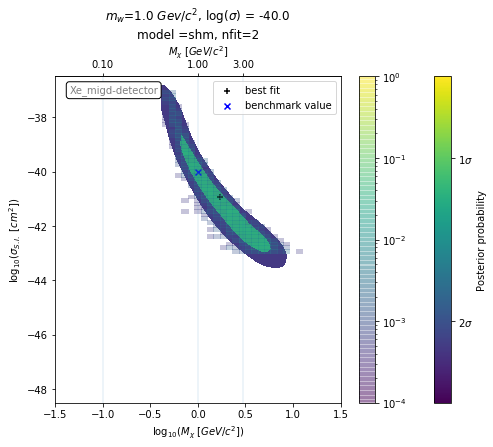

3139 multinest_save_intm_2901-55 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
588  1.0         -40.0                 2      shielded_shm           750
0_1_mw-1.0_s--40.0_shielded_shm_n-2


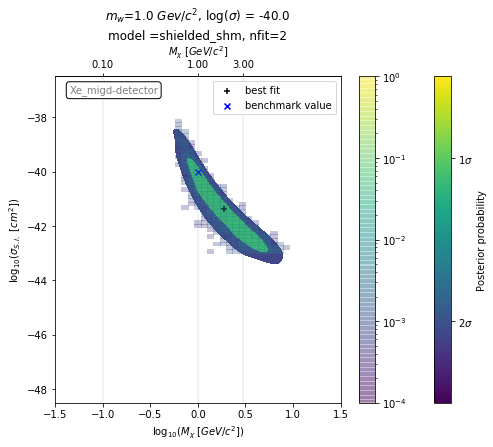

3318 multinest_save_intm_2901-49 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
765  1.0         -40.0                 5               shm          1000
0_2_mw-1.0_s--40.0_shm_n-5


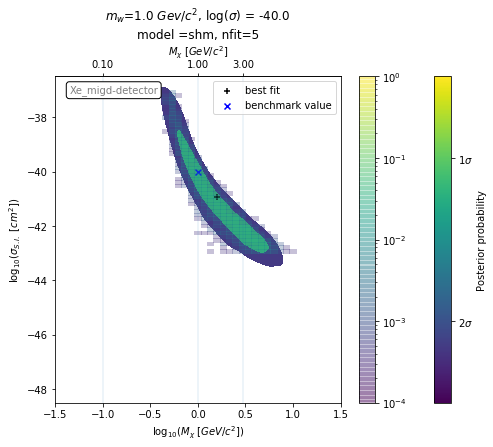

3406 multinest_save_intm_2901-52 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
853  1.0         -40.0                 5      shielded_shm           300
0_3_mw-1.0_s--40.0_shielded_shm_n-5


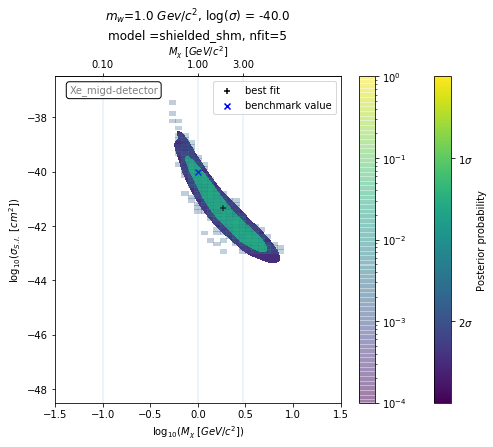

-----
Selection 1:
3391 generic_2901-77 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
838  0.5         -39.0                 2               shm          1000
1_0_mw-0.5_s--39.0_shm_n-2


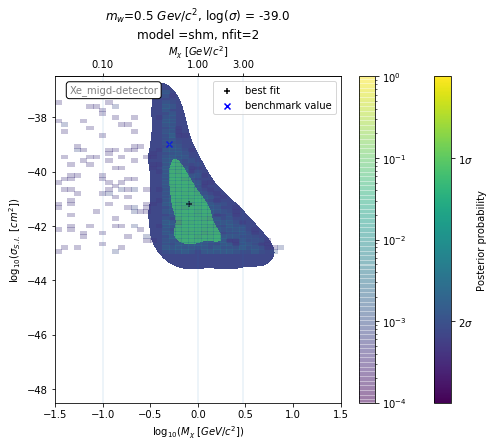

3357 generic_2901-70 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
804  0.5         -39.0                 2      shielded_shm          1000
1_1_mw-0.5_s--39.0_shielded_shm_n-2


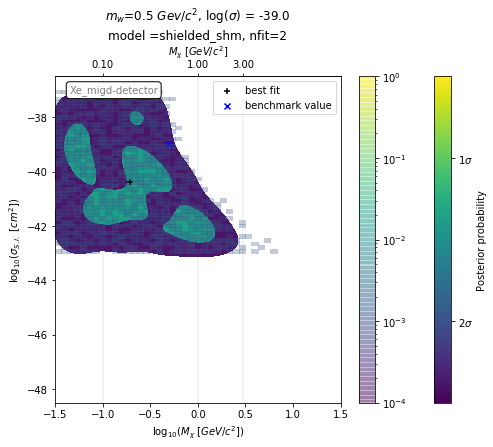

3410 multinest_save_intm_2901-77 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
857  0.5         -39.0                 5               shm          1000
1_2_mw-0.5_s--39.0_shm_n-5


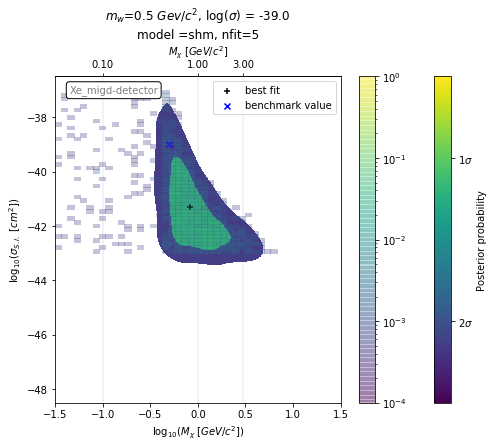

3442 multinest_save_intm_2901-83 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
889  0.5         -39.0                 5      shielded_shm           750
1_3_mw-0.5_s--39.0_shielded_shm_n-5


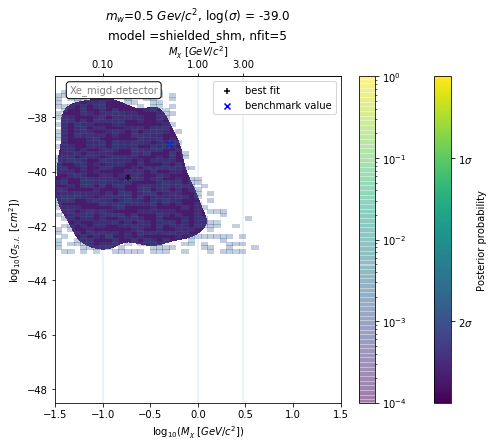

-----
Selection 2:
3384 generic_2901-77 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
831  0.1         -39.0                 2               shm          1000
2_0_mw-0.1_s--39.0_shm_n-2


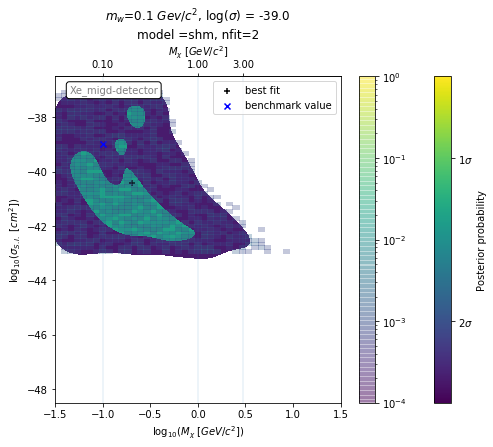

3228 multinest_save_intm_2901-84 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
675  0.1         -39.0                 2      shielded_shm          1000
2_1_mw-0.1_s--39.0_shielded_shm_n-2


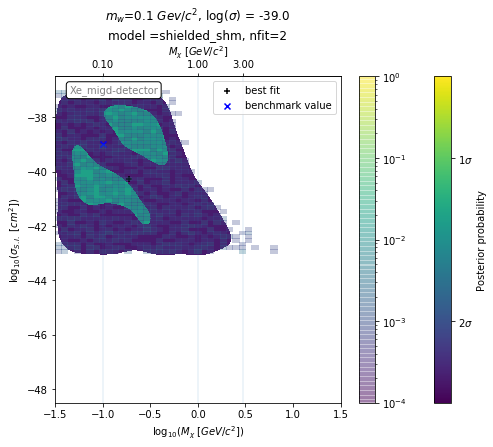

3426 generic_2901-77 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
873  0.1         -39.0                 5               shm          1000
2_2_mw-0.1_s--39.0_shm_n-5


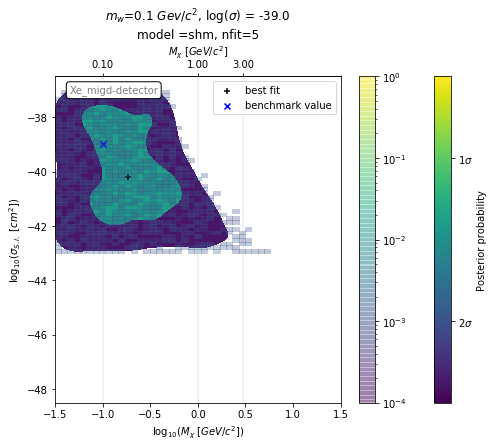

3443 multinest_save_intm_2901-83 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
890  0.1         -39.0                 5      shielded_shm           750
2_3_mw-0.1_s--39.0_shielded_shm_n-5


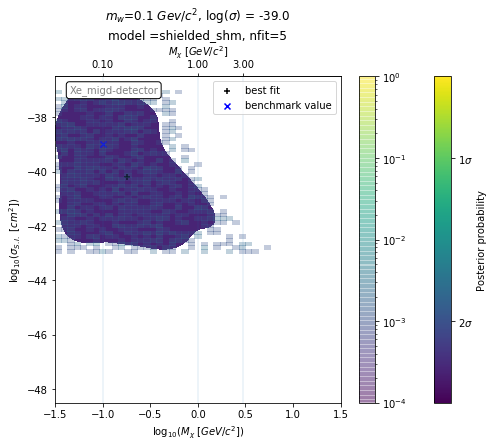

In [260]:
for i, sel in enumerate(selections):
    print(f'-----\nSelection {i}:')
    for j, k in enumerate(sel):
        overlay_hist_confidence(k, f'{i}_{j}_')

In [228]:
mask = np.array(['wide' in n for n in df.config_notes])
df[mask]

,item,config_detector,config_poisson,config_n_energy_bins,config_earth_shielding,config_save_intermediate,config_prior_log_mass_range,config_prior_log_mass_prior_type,config_prior_log_mass_param,config_prior_log_mass_dist,config_prior_log_cross_section_range,config_prior_log_cross_section_prior_type,config_prior_log_cross_section_param,config_prior_log_cross_section_dist,config_prior_density_range,config_prior_density_prior_type,config_prior_density_mean,config_prior_density_std,config_prior_density_param,config_prior_density_dist,config_prior_v_0_range,config_prior_v_0_prior_type,config_prior_v_0_mean,config_prior_v_0_std,config_prior_v_0_param,config_prior_v_0_dist,config_prior_v_esc_range,config_prior_v_esc_prior_type,config_prior_v_esc_mean,config_prior_v_esc_std,config_prior_v_esc_param,config_prior_v_esc_dist,config_prior_k_range,config_prior_k_prior_type,config_prior_k_param,config_prior_k_dist,config_v_0,config_v_esc,config_density,config_mw,config_sigma,config_halo_model,config_spectrum_class,config_det_params,config_start,config_notes,config_nlive,config_fit_parameters,config_fit_time,res_dict_log_mass_fit_res,res_dict_mass_fit_res,res_dict_log_cross_section_fit_res,res_dict_cross_section_fit_res,logZ,logZerr,weighted_samples,mw,n_fit_parameters
914,3467,Xe_migd,False,10,False,True,"[-1.5, 1.5]",flat,"[-1.5, 1.5]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-48, -37]",flat,"[-48, -37]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,-0.69897,-37.0,shm,<class 'DirectDmTargets.detector.DetectorSpect...,"{'material': 'Xe', 'type': 'migdal', 'exp': 25...",2020-02-03 09:22:52.602195,multinest_wide_prior7,50,"[log_mass, log_cross_section]",1230,-0.35 +/- 0.75,0.446 +/- 0.77,-44.44 +/- 2.49,3.62e-45 +/- 2.1e-44,-0.26208742325847334,0.06907659060563269,"[[0.712797224521637, -43.2185332775116], [1.48...",0.2,2
918,3471,Xe_migd,False,10,False,True,"[-1.5, 1.5]",flat,"[-1.5, 1.5]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-48, -37]",flat,"[-48, -37]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,-0.69897,-37.0,shm,<class 'DirectDmTargets.detector.DetectorSpect...,"{'material': 'Xe', 'type': 'migdal', 'exp': 25...",2020-02-03 09:22:52.640209,multinest_wide_prior7,50,"[log_mass, log_cross_section, v_0, v_esc, dens...",3188,-0.28 +/- 0.80,0.519 +/- 0.95,-44.03 +/- 2.87,9.41e-45 +/- 6.2e-44,-0.3634607068241068,0.08186069265239866,"[[-0.22821754217147827, -38.269730627536774, 2...",0.2,5
919,3472,Xe_migd,False,10,False,True,"[-1.5, 1.5]",flat,"[-1.5, 1.5]",<function get_priors.<locals>.<lambda> at 0x7f...,"[-48, -37]",flat,"[-48, -37]",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.001, 0.9]",gauss,0.55,0.1,"(0.55, 0.1)",<function get_priors.<locals>.<lambda> at 0x7f...,"[80, 380]",gauss,233,3,"(233, 3)",<function get_priors.<locals>.<lambda> at 0x7f...,"[379, 709]",gauss,528,24.5,"(528, 24.5)",<function get_priors.<locals>.<lambda> at 0x7f...,"[0.5, 3.5]",flat,"[0.5, 3.5]",<function get_priors.<locals>.<lambda> at 0x7f...,233,528,0.55,-0.30103,-39.0,shm,<class 'DirectDmTargets.detector.DetectorSpect...,"{'material': 'Xe', 'type': 'migdal', 'exp': 25...",2020-02-03 09:21:53.975626,multinest_wide_prior5,50,"[log_mass, log_cross_section]",3719,0.41 +/- 0.53,2.58 +/- 3.1,-44.68 +/- 2.24,2.

In [229]:
np.unique(df.config_prior_v_0_std.values)

array([3])

In [253]:
mask = np.array(['0203' in n for n in df.config_notes])
df[mask].item

887    3440
891    3444
893    3446
895    3448
896    3449
898    3451
899    3452
901    3454
902    3455
905    3458
906    3459
907    3460
909    3462
911    3464
913    3466
915    3468
916    3469
920    3473
925    3478
Name: item, dtype: int64

-----
Selection 0:
3440 multinest_save_intm_0203-7 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
887  0.2         -37.0                 2               shm           200
ERRRRRRRRR


[0.2480158730163219, 0.2480158730163219, 0.7440476190476123]
[0.24556027 0.24801587 0.74404762]
0_0_mw-0.20000000000000004_s--37.0_shm_n-2


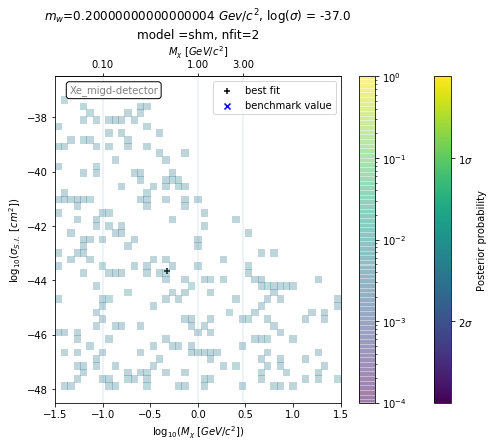

3444 multinest_save_intm_0203-14 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
891  0.2         -37.0                 2               shm           300
ERRRRRRRRR


[0.17062517062455465, 0.17062517062455465, 0.5118755118755262]
[0.16893581 0.17062517 0.51187551]
0_1_mw-0.20000000000000004_s--37.0_shm_n-2


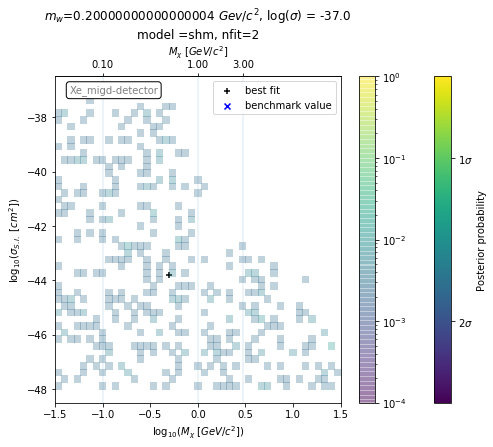

3446 multinest_save_intm_0203-7 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
893  0.2         -37.0                 5               shm           200
ERRRRRRRRR


[0.24281274281098197, 0.24281274281098197, 0.48562548562549734]
[0.24040866 0.24281274 0.48562549]
0_2_mw-0.20000000000000004_s--37.0_shm_n-5


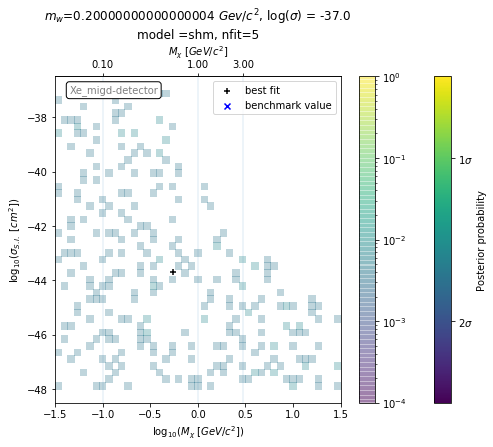

3448 multinest_save_intm_0203-21 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
895  0.2         -37.0                 2               shm           500
ERRRRRRRRR


[0.09963334927322139, 0.09963334927322139, 0.398533397098685]
[0.09864688 0.09963335 0.3985334 ]
0_3_mw-0.20000000000000004_s--37.0_shm_n-2


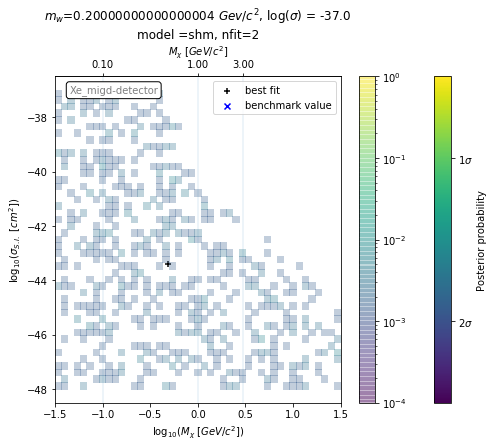

3449 multinest_save_intm_0203-14 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
896  0.2         -37.0                 5               shm           300
ERRRRRRRRR


[0.16653343991413247, 0.16653343991413247, 0.49960031974421487]
[0.16488459 0.16653344 0.49960032]
0_4_mw-0.20000000000000004_s--37.0_shm_n-5


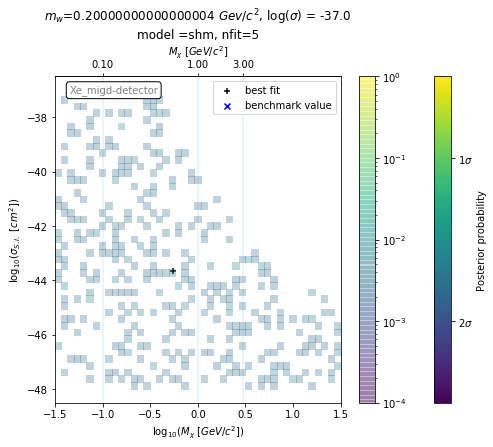

3451 multinest_save_intm_0203-3 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
898  1.0         -42.0                 2               shm           200
0_5_mw-1.0_s--42.0_shm_n-2


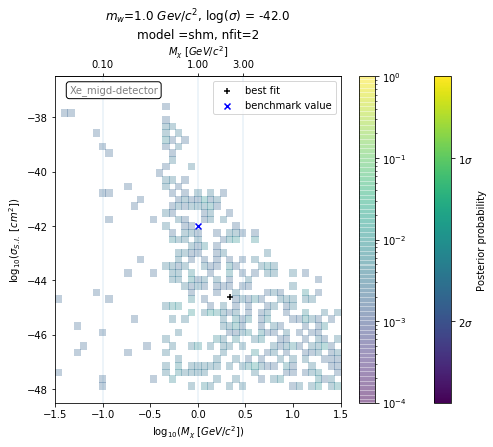

3452 multinest_save_intm_0203-6 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
899  0.5         -38.0                 2               shm           200
0_6_mw-0.5_s--38.0_shm_n-2


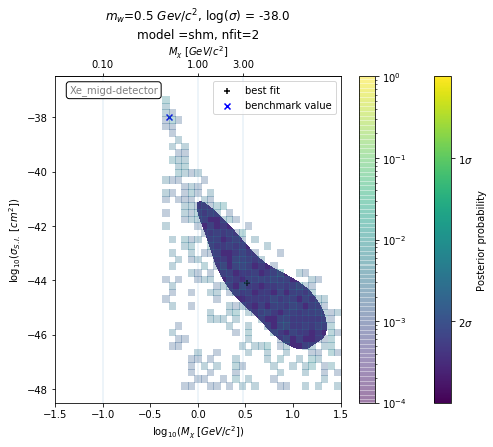

3454 multinest_save_intm_0203-4 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
901  1.0         -41.0                 2               shm           200
0_7_mw-1.0_s--41.0_shm_n-2


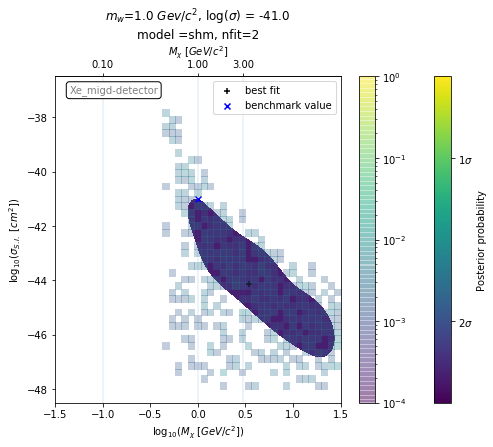

3455 multinest_save_intm_0203-33 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
902  0.5         -39.0                 2      shielded_shm           200
ERRRRRRRRR


[0.2534468775349275, 0.2534468775349275, 0.7603406326033995]
[0.2509375  0.25344688 0.76034063]
0_8_mw-0.5_s--39.0_shielded_shm_n-2


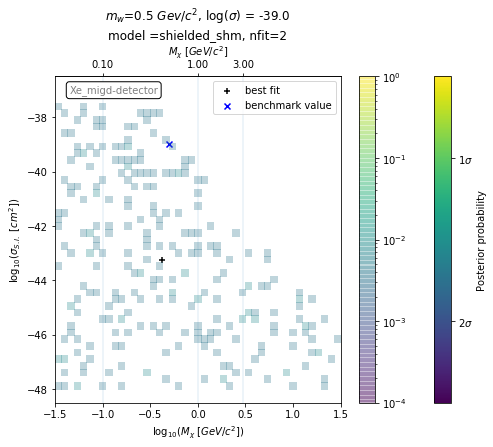

3458 multinest_save_intm_0203-1 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
905  5.0         -44.0                 2               shm           200
0_9_mw-5.000000000000001_s--44.0_shm_n-2


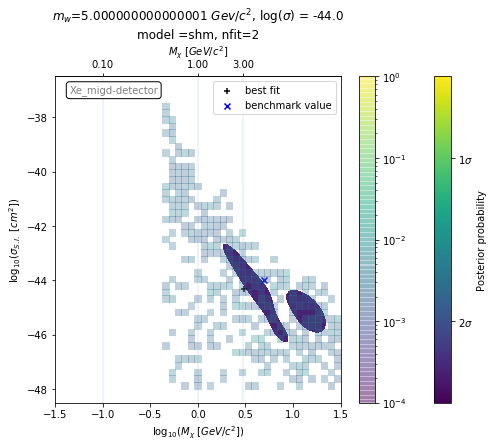

3459 multinest_save_intm_0203-1 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
906  5.0         -44.0                 2               shm           200
0_10_mw-5.000000000000001_s--44.0_shm_n-2


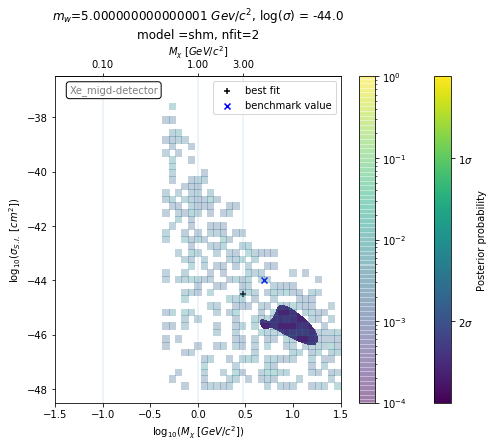

3460 multinest_save_intm_0203-34 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
907  0.5         -38.0                 2      shielded_shm           200
ERRRRRRRRR


[0.2507019655038633, 0.2507019655038633, 0.7521058965102217]
[0.24821977 0.25070197 0.7521059 ]
0_11_mw-0.5_s--38.0_shielded_shm_n-2


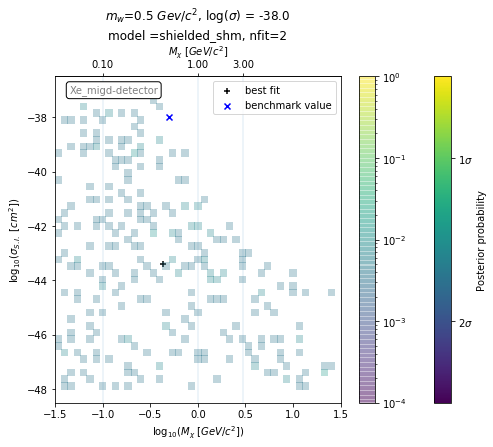

3462 multinest_save_intm_0203-5 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
909  0.5         -39.0                 2               shm           200
0_12_mw-0.5_s--39.0_shm_n-2


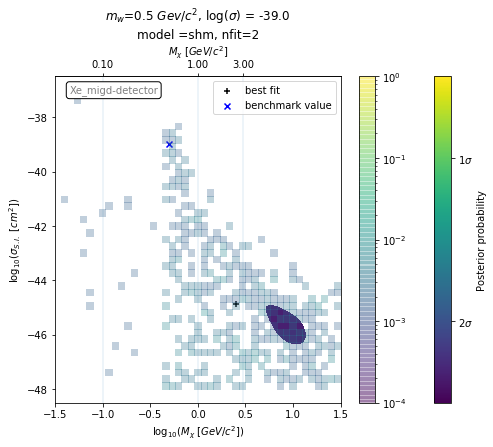

3464 multinest_save_intm_0203-35 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
911  0.2         -37.0                 2      shielded_shm           200
ERRRRRRRRR


[0.26106934001480653, 0.26106934001480653, 1.0442773600668243]
[0.2584845  0.26106934 1.04427736]
0_13_mw-0.20000000000000004_s--37.0_shielded_shm_n-2


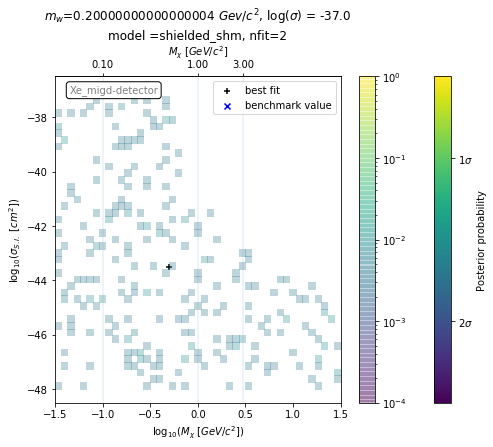

3466 multinest_save_intm_0203-28 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
913  0.2         -37.0                 2               shm          1000
ERRRRRRRRR


[0.04992411534576694, 0.04992411534576694, 0.24962057672338603]
[0.04942982 0.04992412 0.24962058]
0_14_mw-0.20000000000000004_s--37.0_shm_n-2


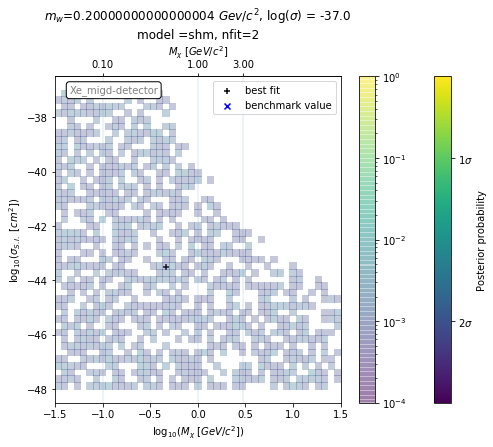

3468 multinest_save_intm_0203-2 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
915  5.0         -43.0                 2               shm           200
0_15_mw-5.000000000000001_s--43.0_shm_n-2


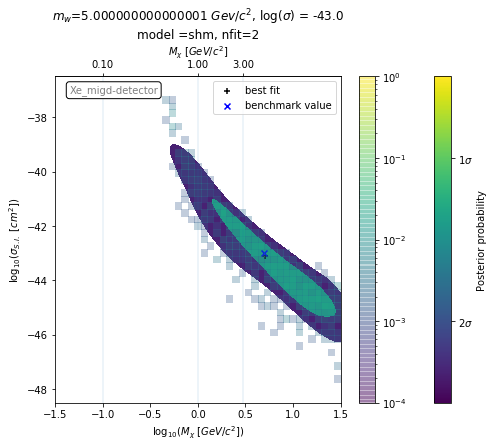

3469 multinest_save_intm_0203-13 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
916  0.5         -38.0                 2               shm           300
0_16_mw-0.5_s--38.0_shm_n-2


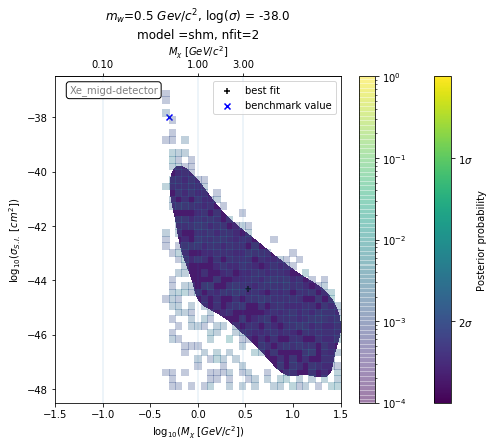

3473 multinest_save_intm_0203-12 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
920  0.5         -39.0                 2               shm           300
0_17_mw-0.5_s--39.0_shm_n-2


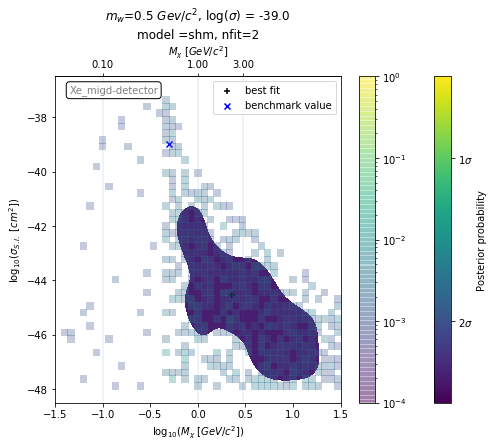

3478 multinest_save_intm_0203-8 [-1.5, 1.5]
      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
925  5.0         -44.0                 2               shm           300
0_18_mw-5.000000000000001_s--44.0_shm_n-2


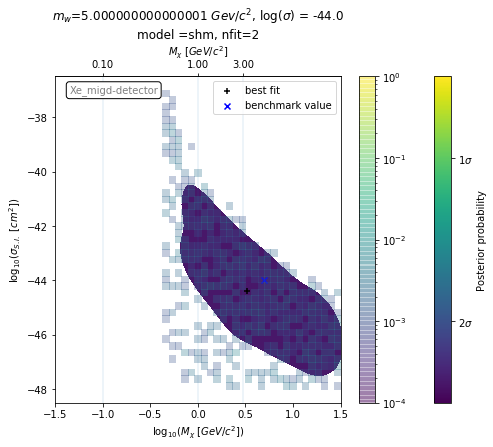

In [261]:
for i, sel in enumerate([df[mask].item.values]):
    print(f'-----\nSelection {i}:')
    for j, k in enumerate(sel):
        overlay_hist_confidence(k, f'{i}_{j}_')